<h3>Maven Analytics: Halloween Candy Rankings Challenge</h3>

In [79]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [80]:
# read the dataset
data = pd.read_csv("Halloween_Candy_Rankings/candy-data.csv")
data.shape

(85, 13)

In [81]:
# check the records
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


<b>Data Dictionary:</b>

 - <b>competitorname:</b> The name of the candy
 - <b>chocolate:</b> Does it contain chocolate?
 - <b>fruity:</b> Is it fruit flavored?
 - <b>caramel:</b> Is there caramel in the candy?
 - <b>peanutalmondy:</b> Does it contain peanuts, peanut butter or almonds?
 - <b>nougat:</b> Does it contain nougat?
 - <b>crispedricewafer:</b> Does it contain crisped rice, wafers, or a cookie component?
 - <b>hard:</b> Is it a hard candy?
 - <b>bar:</b> Is it a candy bar?
 - <b>pluribus:</b> Is it one of many candies in a bag or box?
 - <b>sugarpercent:</b> The percentile of sugar it falls under within the data set
 - <b>pricepercent:</b> The unit price percentile compared to the rest of the set
 - <b>winpercent:</b> The overall win percentage according to 269,000 matchups

In [82]:
# check the datatypes present
data.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

In [83]:
# descriptive statistics
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
competitorname,85,85,100 Grand,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chocolate,85.0,NaN,NaN,NaN,0.435294,0.498738,0.0,0.0,0.0,1.0,1.0
fruity,85.0,NaN,NaN,NaN,0.447059,0.50014,0.0,0.0,0.0,1.0,1.0
caramel,85.0,NaN,NaN,NaN,0.164706,0.373116,0.0,0.0,0.0,0.0,1.0
peanutyalmondy,85.0,NaN,NaN,NaN,0.164706,0.373116,0.0,0.0,0.0,0.0,1.0
nougat,85.0,NaN,NaN,NaN,0.082353,0.276533,0.0,0.0,0.0,0.0,1.0
crispedricewafer,85.0,NaN,NaN,NaN,0.082353,0.276533,0.0,0.0,0.0,0.0,1.0
hard,85.0,NaN,NaN,NaN,0.176471,0.383482,0.0,0.0,0.0,0.0,1.0
bar,85.0,NaN,NaN,NaN,0.247059,0.433861,0.0,0.0,0.0,0.0,1.0
pluribus,85.0,NaN,NaN,NaN,0.517647,0.502654,0.0,0.0,1.0,1.0,1.0


In [84]:
# concise info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [85]:
# check for null/missing values
data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [86]:
# duplicate records
data.duplicated().sum()

0

<b>Insights:</b>

 - Number of Records: 85, Number of Features:13
 - No missing or duplicate records present in the data

In [87]:
# Sort candies by win percentage in descending order
top_candies = data.sort_values(by='winpercent', ascending=False)

# Select top 3 candies
top_3_candies = top_candies[['competitorname', 'winpercent']].reset_index(drop='index').head(3)

# Display the top 3 candies
top_3_candies

,competitorname,winpercent
0,Reese's Peanut Butter cup,84.180290
1,Reese's Miniatures,81.866257
2,Twix,81.642914


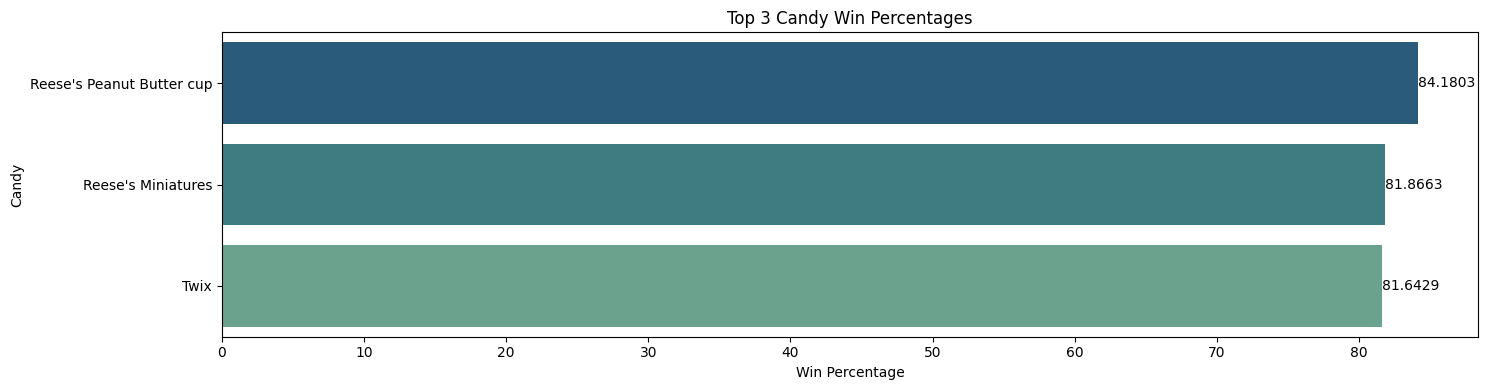

In [88]:
# Top 3 Candy Win Percentages
plt.figure(figsize=(15, 4))
palette1 = sns.color_palette("crest_r", len(top_3_candies['competitorname'].unique()))

ax1 = plt.subplot2grid((1,1),(0,0))

sns.barplot(x='winpercent', y='competitorname', data=top_3_candies, palette=palette1, estimator=np.mean, ax=ax1)
for i in ax1.containers:
    plt.bar_label(i)
plt.title('Top 3 Candy Win Percentages')
plt.xlabel('Win Percentage')
plt.ylabel('Candy')
plt.tight_layout()
plt.show()

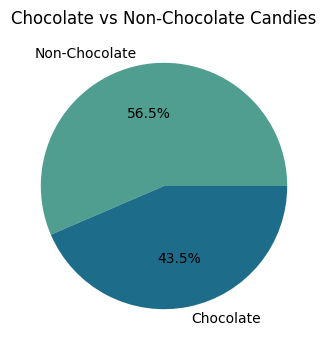

In [89]:
# Chocolate vs Non-Chocolate Candies
chocolate_counts = data['chocolate'].value_counts()
palette1 = sns.color_palette("crest", len(data['chocolate'].unique()))

plt.figure(figsize=(12,4))
chocolate_counts.plot.pie(autopct='%1.1f%%', labels=['Non-Chocolate', 'Chocolate'], colors = palette1)
plt.title('Chocolate vs Non-Chocolate Candies')
plt.ylabel('')
plt.show()

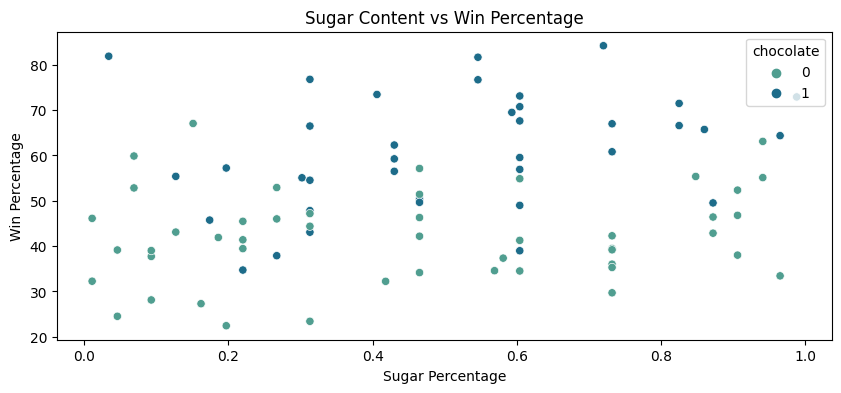

In [90]:
# Relationship Between Sugar Percentage and Win Percentage
plt.figure(figsize=(10, 4))
sns.scatterplot(x='sugarpercent', y='winpercent', hue='chocolate', data=data, palette='crest')
plt.title('Sugar Content vs Win Percentage')
plt.xlabel('Sugar Percentage')
plt.ylabel('Win Percentage')
plt.show()

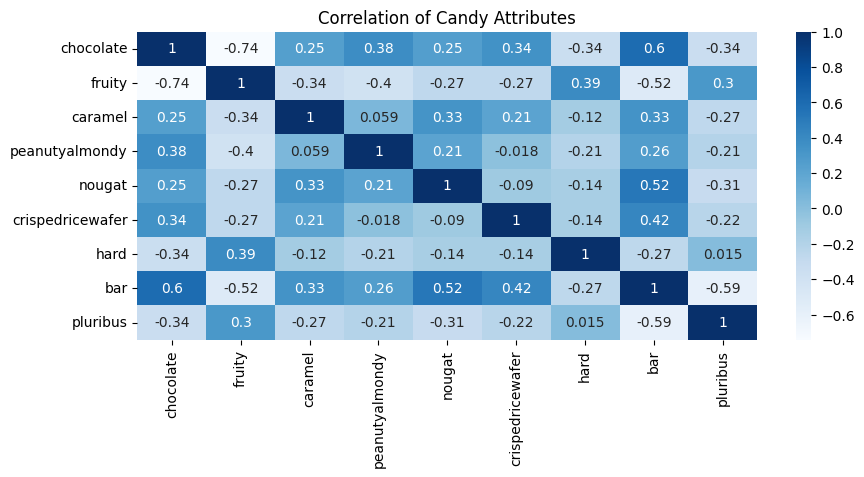

In [91]:
# Candy Types and Attributes Heatmap
plt.figure(figsize=(10, 4))
attributes = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
sns.heatmap(data[attributes].corr(), annot=True, cmap='Blues')
plt.title('Correlation of Candy Attributes')
plt.show()

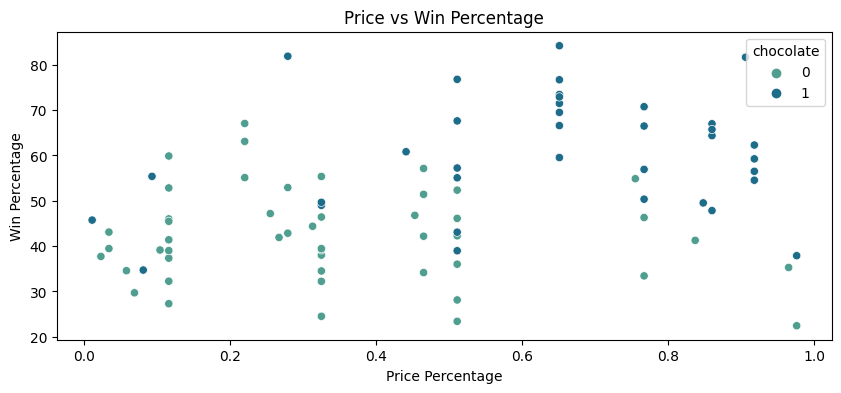

In [92]:
# Price Percentage vs Win Percentage
plt.figure(figsize=(10, 4))
sns.scatterplot(x='pricepercent', y='winpercent', hue='chocolate', data=data, palette='crest')
plt.title('Price vs Win Percentage')
plt.xlabel('Price Percentage')
plt.ylabel('Win Percentage')
plt.show()

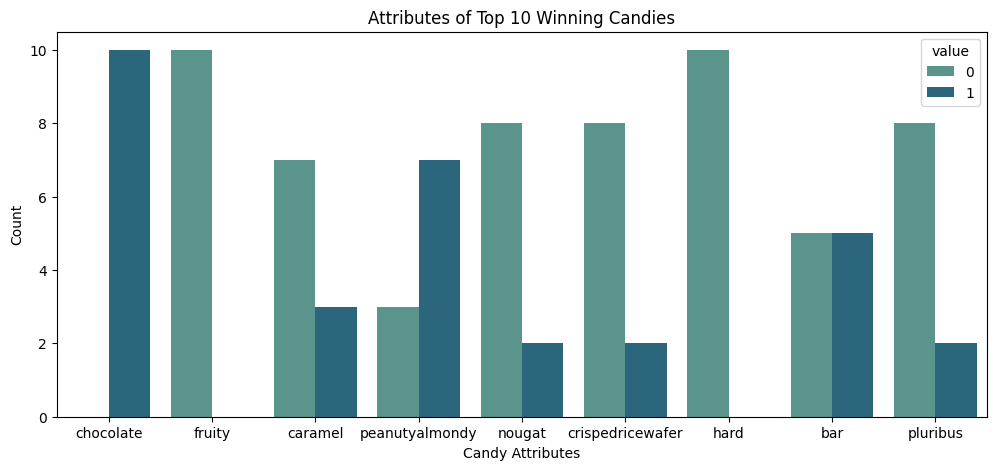

In [93]:
# Top Attributes of Winning Candies
top_10_candies = top_candies.head(10)

plt.figure(figsize=(12,5))
sns.countplot(data=top_10_candies.melt(id_vars=['competitorname'], value_vars=attributes), x='variable', hue='value', palette='crest')
plt.title('Attributes of Top 10 Winning Candies')
plt.xlabel('Candy Attributes')
plt.ylabel('Count')
plt.show()